# Sprint 深層学習スクラッチ ニューラルネットワーク

In [28]:
# MNISTダウンロード
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [29]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [30]:
X_train[0].dtype

dtype('uint8')

In [31]:
# 用意した画像データセットを(サンプル数, 一次元の画素数)型に変換
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


# 可視化

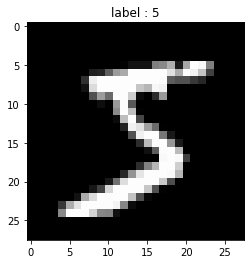

In [5]:
# 画像可視化
import matplotlib.pyplot as plt
%matplotlib inline

index = 0
image = X_train[index].reshape(28, 28)

plt.imshow(image, 'gray')
plt.title(f'label : {y_train[index]}')
plt.show()

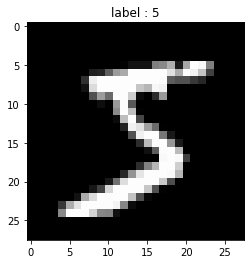

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [6]:
# コラム
import numpy as np
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # 値を確認

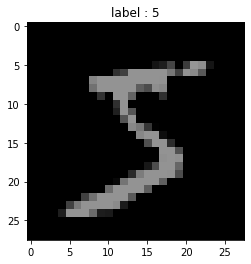

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [7]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる
plt.imshow(image, 'gray', vmin=0, vmax=255)
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # 値を確認

# 前処理

In [32]:
# 画素値を正規化処理
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.min(), X_train.max())
print(X_test.min(), X_test.max())

0.0 1.0
0.0 1.0


In [9]:
# ラベルをone-hot表現する
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_oh = enc.fit_transform(y_train[:, np.newaxis])
y_test_oh = enc.transform(y_test[:, np.newaxis])
print(y_train.shape, y_train_oh.shape, y_test_oh.shape)
print(y_train_oh)

(60000,) (60000, 10) (10000, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [33]:
# trainとvalデータに分割
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(48000, 784) (12000, 784)
(48000,) (12000,)


# スクラッチ雛形

In [ ]:
class ScratchSimpleNeuralNetrowkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器
    Parameters
    ----------
    Attributes
    ----------
    """
    def __init__(self, verbose = True):
        self.verbose = verbose
        pass
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程などを出力する
            print()
        pass
    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        pass
        return

## ミニバッチ処理

In [5]:
# ミニバッチ処理のサンプルクラス
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

In [6]:
get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)
print(len(get_mini_batch))
print(get_mini_batch[5])

2400
(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([0, 7, 3, 1, 9, 0, 8, 6, 0, 7, 8, 3, 1, 3, 4, 9, 2, 9, 1, 8],
      dtype=uint8))


# 学習

【問題1】重みの初期値を決めるコードの作成

In [12]:
# 問題1
def __init__(self, input_size=784, hidden1_size=400, hidden2_size=200, output_size=10,\
            sigma=0.01, batch_size=20, verbose = True):
    self.verbose = verbose
    self.input_size = input_size
    self.hidden1_size = hidden1_size
    self.hidden2_size = hidden2_size
    self.output_size = output_size
    self.sigma = sigma
    self.batch_size = batch_size
    self.Layers = {}
    self.Layers['W1'] = sigma * np.random.rand(self.input_size, self.hidden1_size)
    self.Layers['b1'] = sigma * np.random.rand(self.hidden1_size)
    self.Layers['W2'] = sigma * np.random.rand(self.hidden1_size, self.hidden2_size)
    self.Layers['b2'] = sigma * np.random.rand(self.hidden2_size)
    self.Layers['W3'] = sigma * np.random.rand(self.hidden2_size, self.output_size)
    self.Layers['b3'] = sigma * np.random.rand(self.output_size)
        

(1.5897040112067273e-08, 0.009999984798504473)

【問題2】フォワードプロパゲーションの実装

In [ ]:
# 問題2
def forward(self, X):
    batch_size = X.shape[0]
    self.X = X.reshape(batch_size, 784)
    # 1層目 出力shape:(batch_size, hidden1_size)
    self.a_1 = np.dot(self.X, self.Layers['W1']) + self.Layers['b1']
    # 1層目活性化関数
    self.z_1 = self.tanh(self.a_1)
    # 2層目 出力shape:(batch_size, hidden2_size)
    self.a_2 = np.dot(self.z_1, self.Layers['W2']) + self.Layers['b2']
    # 2層目活性化関数
    self.z_2 = self.tanh(self.a_2)
    # 3層目 出力shape:(batch_size, output_size)
    self.a_3 = np.dot(self.z_2, self.Layers['W3']) + self.Layers['b3']
    # 3層目活性化関数 (拝借)
    log_z_3 = self.a_3 - self.logsumexp(self.a_3)
    self.z_3 = np.exp(log_z_3)
#       print(log_z_3.shape, self.z_3.shape)
    return log_z_3

【問題3】交差エントロピー誤差の実装

In [30]:
def cross_entropy(Z, y):
    return np.mean(y * np.log(Z))

【問題4】バックプロパゲーションの実装

In [ ]:
def backprop(self, alpha=0.1):
    ga3 = (self.z_3 - self.y) / self.batch_size
    self.Layers['b3'] -= alpha * ga3.sum(axis=0)
    self.Layers['W3'] -= alpha * np.dot(self.z_2.T, ga3)
    gz2 = np.dot(ga3, self.Layers['W3'].T)
    ga2 = gz2 * (1 - self.z_2 ** 2)
    self.Layers['b2'] -= alpha * ga2.sum(axis=0)
    self.Layers['W2'] -= alpha * np.dot(self.z_1.T, ga2)
    gz1 = np.dot(ga2, self.Layers['W2'].T)
    ga1 = gz1 * (1 - self.z_1 ** 2)
    self.Layers['b1'] -= alpha * ga1.sum(axis=0)
    self.Layers['W1'] -= alpha * np.dot(self.X.T, ga1)

【問題5】推定

In [ ]:
def predict(self, X):
    """
    ニューラルネットワーク分類器を使い推定する。
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        サンプル
    Returns
    -------
        次の形のndarray, shape (n_samples, 1)
        推定結果
    """
    log_test_z3 = self.forward(X)
    
    return np.argmax(self.z_3, axis=1)

【問題6】学習と推定, 【問題7】学習曲線のプロット

In [7]:
# MNISTダウンロード
import numpy as np
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 用意した画像データセットを(サンプル数, 一次元の画素数)型に変換
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
print(X_train.shape, X_test.shape)

# 画素値を正規化処理
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.min(), X_train.max())
print(X_test.min(), X_test.max())

# trainとvalデータに分割
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(60000, 784) (10000, 784)
0.0 1.0
0.0 1.0
(48000, 784) (12000, 784)
(48000,) (12000,)


In [8]:
class ScratchSimpleNeuralNetrowkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器
    Parameters
    ----------
    Attributes
    ----------
    """
    # 問題1
    def __init__(self, input_size=784, hidden1_size=400, hidden2_size=200, output_size=10,\
                 sigma=0.01, batch_size=20, verbose = True):
        self.verbose = verbose
        self.input_size = input_size
        self.hidden1_size = hidden1_size
        self.hidden2_size = hidden2_size
        self.output_size = output_size
        self.sigma = sigma
        self.batch_size = batch_size
        self.Layers = {}
        self.Layers['W1'] = sigma * np.random.rand(self.input_size, self.hidden1_size)
        self.Layers['b1'] = sigma * np.random.rand(self.hidden1_size)
        self.Layers['W2'] = sigma * np.random.rand(self.hidden1_size, self.hidden2_size)
        self.Layers['b2'] = sigma * np.random.rand(self.hidden2_size)
        self.Layers['W3'] = sigma * np.random.rand(self.hidden2_size, self.output_size)
        self.Layers['b3'] = sigma * np.random.rand(self.output_size)
        
    # 活性化関数の定義
    def sigmoid(self, A):
        return 1 / (1 + np.exp(-A))

    def tanh(self, A):
        return np.tanh(A)

    def softmax(self, A):
        return np.exp(A) / np.sum(np.exp(A))
    
    # 拝借
    def logsumexp(self, x):
        """Calculates log(sum(exp(x))).
        """
        xmax = x.max(axis=1, keepdims=True)
        return np.log(np.exp(x - xmax).sum(axis=1, keepdims=True)) + xmax
    
    # 問題3
    def loss(self, y, z):
        if y.ndim == 1:
            z = z.reshape(1, z.size)
            y = y.reshape(1, y.size)
        return -(y * z).mean(axis=0).sum()
        
    
    # 問題2
    def forward(self, X):
        batch_size = X.shape[0]
        self.X = X.reshape(batch_size, 784)
        # 1層目 出力shape:(batch_size, hidden1_size)
        self.a_1 = np.dot(self.X, self.Layers['W1']) + self.Layers['b1']
        # 1層目活性化関数
        self.z_1 = self.tanh(self.a_1)
        # 2層目 出力shape:(batch_size, hidden2_size)
        self.a_2 = np.dot(self.z_1, self.Layers['W2']) + self.Layers['b2']
        # 2層目活性化関数
        self.z_2 = self.tanh(self.a_2)
        # 3層目 出力shape:(batch_size, output_size)
        self.a_3 = np.dot(self.z_2, self.Layers['W3']) + self.Layers['b3']
        # 3層目活性化関数 (拝借)
        log_z_3 = self.a_3 - self.logsumexp(self.a_3)
        self.z_3 = np.exp(log_z_3)
        print(log_z_3)
        return log_z_3
        
    # 問題4 やっぱ誤差逆伝播苦手
    def backprop(self, alpha=0.01):
        # 3層
        ga3 = (self.z_3 - self.y) / self.batch_size
        self.Layers['b3'] -= alpha * ga3.sum(axis=0)
        self.Layers['W3'] -= alpha * np.dot(self.z_2.T, ga3)
        # 2層
        gz2 = np.dot(ga3, self.Layers['W3'].T)
        ga2 = gz2 * (1 - self.z_2 ** 2)
        self.Layers['b2'] -= alpha * ga2.sum(axis=0)
        self.Layers['W2'] -= alpha * np.dot(self.z_1.T, ga2)
        # 1層
        gz1 = np.dot(ga2, self.Layers['W2'].T)
        ga1 = gz1 * (1 - self.z_1 ** 2)
        self.Layers['b1'] -= alpha * ga1.sum(axis=0)
        self.Layers['W1'] -= alpha * np.dot(self.X.T, ga1)
    
    # 正解率を出力
    def accuracy(self, y):
        return (self.z_3.argmax(axis=1) == y).sum()
        
    # 学習して重み・バイアス更新
    def fit(self, X, y, X_val=None, y_val=None, epochs=20):
        """
        ニューラルネットワーク分類器を学習する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
#         get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size)
        div_iter = 600
        plot_data = []
        
        for epoch in range(epochs):
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size)
            loss_sum = 0
            for i in range(len(get_mini_batch)):
                X_train, y_train = get_mini_batch[i]
                self.y = (y_train.reshape(-1, 1) == np.arange(10)).astype(np.float64)
                logz_3 = self.forward(X_train)
                loss = self.loss(self.y, logz_3)
                accuracy = self.accuracy(y_train)
                self.backprop()
                loss_sum += loss
                
                if self.verbose and (i + 1) % div_iter == 0:
                    #verboseをTrueにした際は学習過程などを出力する
                    train_loss = loss_sum / div_iter
                    self.y_val = (y_val.reshape(-1, 1) == np.arange(10)).astype(np.float64)
                    val_logz_3 = self.forward(X_val)
                    val_loss = self.loss(self.y_val, val_logz_3)
                    val_accuracy = self.accuracy(y_val)
                    print(f'epoch: {epoch + 1} / {epochs}, iteration: {i + 1} / {len(get_mini_batch)} | train loss : {train_loss:.3} | val loss: {val_loss:.3} | accuracy: {val_accuracy / len(y_val)}')
                    loss_sum = 0
                    
                    iters_per_epoch = len(X) / self.batch_size
                    plot_data.append((epoch + (i + 1) / iters_per_epoch, train_loss, val_loss))
                    
        if self.verbose:
            epochs, train_loss, val_loss = zip(*plot_data)
            plt.plot(epochs, train_loss, color='g', label='train loss')
            plt.plot(epochs, val_loss, color='b', label='val_loss')
            plt.xlabel('epoch')
            plt.ylabel('loss')
            plt.legend()
            plt.show()
#             print(self.Layers)
    
    # 問題5 ラベル予測
    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        log_test_z3 = self.forward(X)
        
        return np.argmax(self.z_3, axis=1)

In [9]:
network = ScratchSimpleNeuralNetrowkClassifier()
network.fit(X_train, y_train, X_val, y_val, epochs=10)

[[-2.27685573 -2.30742591 -2.27613008 -2.25818471 -2.30935859 -2.3652982
  -2.25908092 -2.32048513 -2.3505039  -2.30844223]
 [-2.27862166 -2.30699295 -2.27809741 -2.26115584 -2.3088888  -2.36119881
  -2.26178751 -2.31920523 -2.34704747 -2.30800099]
 [-2.27975302 -2.30668269 -2.27941896 -2.26315378 -2.30856361 -2.35849401
  -2.26357898 -2.31840849 -2.34476723 -2.30769695]
 [-2.2754724  -2.30778294 -2.27449126 -2.25573993 -2.30975335 -2.3686567
  -2.25683743 -2.32153198 -2.35335906 -2.30881198]
 [-2.28077737 -2.30643513 -2.28058117 -2.26496891 -2.30823653 -2.35611532
  -2.26522007 -2.31766822 -2.34268539 -2.30741859]
 [-2.27508212 -2.30790707 -2.27400641 -2.25505238 -2.30986392 -2.36959598
  -2.2562158  -2.32183577 -2.35415987 -2.30891322]
 [-2.27993881 -2.30664497 -2.27961131 -2.2635341  -2.30849087 -2.35807118
  -2.26387368 -2.31824602 -2.34438472 -2.30764438]
 [-2.27769709 -2.30723722 -2.27707161 -2.25962003 -2.30912562 -2.36334905
  -2.26034123 -2.31987581 -2.34883909 -2.30823547]
 [

[[-2.13341517 -2.42973771 -2.15042339 -2.33339846 -2.34198357 -2.39921921
  -2.18572471 -2.50118267 -2.24658944 -2.37474371]
 [-2.16669485 -2.40158042 -2.18027468 -2.32657803 -2.3329116  -2.37931285
  -2.2073929  -2.46076807 -2.25623909 -2.35912557]
 [-2.12528212 -2.43674385 -2.14314415 -2.335094   -2.34433344 -2.40424534
  -2.18047699 -2.51123092 -2.24431479 -2.37873288]
 [-2.14679321 -2.41829093 -2.16241911 -2.33058015 -2.33830067 -2.39107041
  -2.19438563 -2.48477958 -2.25038096 -2.36841443]
 [-2.1231531  -2.43860593 -2.14123601 -2.33560423 -2.34496047 -2.40556949
  -2.1790351  -2.5139026  -2.24371568 -2.37977762]
 [-2.12312176 -2.43865797 -2.14117217 -2.33558711 -2.34497352 -2.40559489
  -2.17906927 -2.51393771 -2.24370579 -2.37976859]
 [-2.094027   -2.4645043  -2.11489431 -2.34221959 -2.35369238 -2.42418776
  -2.16025765 -2.55090294 -2.2358442  -2.39445136]
 [-2.16406359 -2.40382482 -2.17788348 -2.32709346 -2.33366304 -2.38083315
  -2.20564916 -2.46391411 -2.25544328 -2.36031818]


[[-2.18114941 -2.40212662 -2.36416862 -2.05161772 -2.25535867 -2.45561738
  -2.23975139 -2.33203401 -2.46022075 -2.36060007]
 [-2.17413103 -2.40950692 -2.3676607  -2.03766264 -2.25324712 -2.46464694
  -2.23666996 -2.33438876 -2.46955451 -2.36447528]
 [-2.15489212 -2.43031698 -2.37753818 -1.99930137 -2.24776764 -2.49008052
  -2.22829428 -2.34114461 -2.49582838 -2.375466  ]
 [-2.16325414 -2.42111536 -2.37317449 -2.01604928 -2.25014303 -2.47888401
  -2.23192124 -2.33810908 -2.48427829 -2.37061305]
 [-2.159168   -2.42561252 -2.37528694 -2.00785654 -2.24896037 -2.48432697
  -2.23014725 -2.33958728 -2.48991532 -2.37297041]
 [-2.14556951 -2.44071509 -2.38251257 -1.98056175 -2.24521459 -2.50273427
  -2.2243316  -2.3446722  -2.50894896 -2.38106175]
 [-2.1572067  -2.42774041 -2.37633557 -2.00389221 -2.24840319 -2.48698436
  -2.22929247 -2.3402957  -2.49264814 -2.37414574]
 [-2.17655298 -2.40686585 -2.36644275 -2.04256321 -2.2539758  -2.46147989
  -2.23775741 -2.33354514 -2.46629536 -2.36314383]


[[-2.33977873 -2.69853907 -2.51518303 -2.26507858 -2.81316624 -2.0048153
  -2.67950743 -2.20616058 -1.99155124 -1.95351874]
 [-2.33285795 -2.64154353 -2.4862468  -2.26589193 -2.74634828 -2.03649091
  -2.62947628 -2.21238272 -2.02500718 -1.99087917]
 [-2.33003556 -2.6153989  -2.47302519 -2.26666816 -2.71548966 -2.05176107
  -2.60643218 -2.2157963  -2.04110171 -2.00877957]
 [-2.32949111 -2.61066738 -2.47069644 -2.26677655 -2.70992036 -2.05459546
  -2.60233375 -2.21643653 -2.04404279 -2.0120865 ]
 [-2.33297163 -2.64251839 -2.48673809 -2.26585681 -2.74744688 -2.03593782
  -2.63030193 -2.21229392 -2.02442182 -1.99023167]
 [-2.32336682 -2.54361314 -2.43730298 -2.27018728 -2.63036243 -2.09619495
  -2.54326884 -2.22692279 -2.08781996 -2.06054787]
 [-2.33002483 -2.61558107 -2.47316175 -2.26667794 -2.71571144 -2.05166276
  -2.60661687 -2.215764   -2.04097826 -2.00862365]
 [-2.31843752 -2.46910472 -2.40118038 -2.27643024 -2.54116367 -2.14656517
  -2.47763472 -2.24161811 -2.14058923 -2.11878035]
 

[[-2.18694578 -2.33388549 -2.22789563 -2.27801993 -2.38829842 -2.48322926
  -2.31811255 -2.29924603 -2.29230572 -2.24909484]
 [-2.15840924 -2.35149653 -2.20987282 -2.27201354 -2.40778877 -2.52166844
  -2.32148863 -2.3012378  -2.28967191 -2.2391948 ]
 [-2.15504211 -2.35364346 -2.20773022 -2.27131701 -2.4100881  -2.52624256
  -2.32194379 -2.30151275 -2.28938243 -2.23803505]
 [-2.17188422 -2.34307363 -2.21838206 -2.27487943 -2.39849833 -2.50338839
  -2.31986241 -2.3002563  -2.29087762 -2.24383027]
 [-2.1451975  -2.35996581 -2.20149191 -2.26927099 -2.41691496 -2.53963626
  -2.32317447 -2.3023545  -2.28857509 -2.23475228]
 [-2.18445084 -2.33539021 -2.22633374 -2.27749542 -2.38995075 -2.48653491
  -2.31836265 -2.29945432 -2.29210822 -2.24818838]
 [-2.1705379  -2.34388536 -2.21754428 -2.27454721 -2.39942956 -2.50524719
  -2.32006557 -2.30034209 -2.29075397 -2.24334392]
 [-2.16135463 -2.34963365 -2.21173074 -2.27258916 -2.40575766 -2.51767532
  -2.32117213 -2.30099259 -2.28993589 -2.24021034]


[[-2.17739017 -2.48782169 -2.22932583 -2.16749625 -2.57835144 -2.3318848
  -2.24710808 -2.08718336 -2.53564649 -2.30714582]
 [-2.19653031 -2.45330183 -2.23999147 -2.18592174 -2.53842214 -2.32667344
  -2.2538496  -2.11417965 -2.50315215 -2.30453724]
 [-2.14227508 -2.55493442 -2.21014585 -2.13379667 -2.65545345 -2.34307433
  -2.23564162 -2.0376008  -2.59869042 -2.31355297]
 [-2.14183309 -2.55583304 -2.20990437 -2.13336953 -2.65648292 -2.34320668
  -2.23549438 -2.03696428 -2.59955298 -2.31364174]
 [-2.1528124  -2.53430199 -2.21582035 -2.14386876 -2.6318496  -2.33943274
  -2.2389448  -2.05242516 -2.57939625 -2.31142347]
 [-2.11961591 -2.60107541 -2.19802833 -2.11226502 -2.70759883 -2.35157839
  -2.22888287 -2.00596645 -2.64145163 -2.31880703]
 [-2.16628005 -2.50854816 -2.22318959 -2.15676507 -2.6022889  -2.33512131
  -2.24331119 -2.07146651 -2.55524071 -2.30895514]
 [-2.13708659 -2.56533397 -2.20734295 -2.12882375 -2.66726178 -2.34491526
  -2.23405321 -2.03028833 -2.60838302 -2.31469216]
 

[[-2.13643265 -2.36912491 -2.28629351 -2.41192355 -2.21782581 -2.3808413
  -2.11826637 -2.35779491 -2.23181811 -2.60969451]
 [-2.23998161 -2.29705563 -2.30187921 -2.35572712 -2.26002437 -2.33798709
  -2.21915619 -2.3196477  -2.27435203 -2.43785863]
 [-2.11055891 -2.38928067 -2.28291819 -2.42711603 -2.20811779 -2.3929158
  -2.09333508 -2.36887665 -2.22188    -2.65469258]
 [-2.16237394 -2.34986514 -2.28986789 -2.39712549 -2.22795186 -2.36926645
  -2.14337808 -2.34735782 -2.24207246 -2.56535985]
 [-2.1354887  -2.36982555 -2.28618692 -2.41244287 -2.21747107 -2.38129901
  -2.11732717 -2.35816567 -2.23145807 -2.61136987]
 [-2.12944387 -2.37446261 -2.28539592 -2.41596086 -2.21516397 -2.38406299
  -2.11151639 -2.36069722 -2.22912143 -2.62176774]
 [-2.13019802 -2.37388016 -2.28547987 -2.41555407 -2.21544099 -2.38372411
  -2.11221624 -2.36038946 -2.2294041  -2.62049326]
 [-2.13765664 -2.36819872 -2.28644504 -2.4111958  -2.21829605 -2.38029394
  -2.11947282 -2.35726959 -2.23228813 -2.60760163]
 [

[[-2.06155526 -2.52562323 -2.16409092 -2.35623807 -2.44423374 -2.65291404
  -2.05175779 -2.41433627 -2.28248841 -2.24524548]
 [-2.18682781 -2.37972859 -2.23451676 -2.33187492 -2.37047479 -2.48445568
  -2.16915558 -2.35062787 -2.29398942 -2.26586071]
 [-2.12538469 -2.44845216 -2.19967864 -2.34274953 -2.40505814 -2.56499379
  -2.11112687 -2.37999832 -2.28733577 -2.25460375]
 [-2.11929909 -2.45555139 -2.19624167 -2.34396363 -2.40860128 -2.57313811
  -2.10545347 -2.38310825 -2.28681769 -2.25358918]
 [-2.10279885 -2.47500665 -2.18701698 -2.3472826  -2.41852334 -2.59567135
  -2.08996238 -2.39166876 -2.28542559 -2.25098574]
 [-2.14708347 -2.42360659 -2.21191627 -2.33865983 -2.39249142 -2.53607751
  -2.13154434 -2.36921428 -2.28946721 -2.25837603]
 [-2.10867543 -2.46803468 -2.19027806 -2.34605925 -2.41497249 -2.58759369
  -2.09549188 -2.38859386 -2.28592221 -2.25189624]
 [-2.12157153 -2.45289174 -2.19752619 -2.34346915 -2.40726479 -2.57013188
  -2.10755225 -2.38193977 -2.28703078 -2.25398401]


[[-2.18113154 -2.83650714 -2.20991502 -2.04839613 -2.22665267 -2.56577161
  -2.33142758 -2.33288576 -1.93683378 -2.70719233]
 [-2.19749997 -2.75290555 -2.22058296 -2.07851362 -2.23121115 -2.52831629
  -2.32442633 -2.32254232 -1.98167524 -2.65041408]
 [-2.16886534 -2.90343901 -2.20216621 -2.0255616  -2.22400114 -2.59610194
  -2.33774749 -2.34207131 -1.90238785 -2.75276815]
 [-2.17428313 -2.8734908  -2.20554912 -2.03565489 -2.2250792  -2.58249218
  -2.33484315 -2.33785666 -1.91761983 -2.73239122]
 [-2.18715321 -2.80469985 -2.2138357  -2.05966641 -2.2282231  -2.55144702
  -2.32862393 -2.3288268  -1.95366499 -2.68559841]
 [-2.25052578 -2.52071815 -2.25750726 -2.17221663 -2.2517937  -2.42742552
  -2.31099964 -2.30074186 -2.11791744 -2.49355128]
 [-2.20429606 -2.72002032 -2.22513113 -2.09089937 -2.23337001 -2.51372084
  -2.32196331 -2.31882366 -1.99989954 -2.62807741]
 [-2.19092396 -2.78548601 -2.21629218 -2.06656366 -2.22924928 -2.54284931
  -2.32705869 -2.32644696 -1.96396693 -2.67251222]


[[-2.40018828 -2.49153264 -2.20592149 -2.29733283 -2.42966673 -2.29322435
  -2.48235221 -2.10112439 -2.17111306 -2.23569304]
 [-2.43003866 -2.62637381 -2.15587898 -2.29384712 -2.4960878  -2.29299103
  -2.56550548 -2.02495121 -2.10822365 -2.21418618]
 [-2.4275513  -2.61500224 -2.15993147 -2.29402311 -2.49045863 -2.29285937
  -2.55854925 -2.03095732 -2.11326716 -2.21578184]
 [-2.4165135  -2.56507833 -2.17804949 -2.29500743 -2.46582173 -2.29257209
  -2.52788666 -2.05828924 -2.13596959 -2.22325008]
 [-2.42510097 -2.60380106 -2.16392998 -2.29421374 -2.48494411 -2.29274537
  -2.55171465 -2.03696129 -2.11827687 -2.21736585]
 [-2.42342708 -2.59613363 -2.16671085 -2.29432759 -2.48116627 -2.2926671
  -2.54701784 -2.04109636 -2.12172794 -2.21851509]
 [-2.41418957 -2.55463083 -2.18193077 -2.2953106  -2.46061693 -2.29256991
  -2.52141111 -2.06422111 -2.14082275 -2.22492474]
 [-2.4207605  -2.58414821 -2.17107188 -2.29458711 -2.47519995 -2.29260631
  -2.53963741 -2.04766323 -2.12717367 -2.22032708]
 

[[-2.49995361 -2.45307969 -2.26300294 -2.21520439 -2.31042494 -2.26394715
  -2.14691517 -2.38109683 -2.29025458 -2.25358722]
 [-2.58635503 -2.59516843 -2.23107972 -2.16425401 -2.32352695 -2.24538133
  -2.06272696 -2.43887617 -2.2760545  -2.23534059]
 [-2.5920921  -2.60475971 -2.22900879 -2.1609902  -2.32456268 -2.24429125
  -2.05732791 -2.442866   -2.27523078 -2.23435323]
 [-2.63799446 -2.68265796 -2.21313506 -2.13560443 -2.33337544 -2.23641997
  -2.01463606 -2.47556617 -2.2690652  -2.22671152]
 [-2.61904594 -2.65014445 -2.21969268 -2.14601981 -2.329558   -2.23954834
  -2.03213636 -2.46185432 -2.27151712 -2.22968228]
 [-2.63060026 -2.66986655 -2.21569861 -2.13965827 -2.33186114 -2.23762441
  -2.0214686  -2.47015569 -2.27001517 -2.22783625]
 [-2.59411296 -2.60801529 -2.22838175 -2.15987694 -2.32490577 -2.24393447
  -2.05542455 -2.44422385 -2.27496657 -2.23399284]
 [-2.61753662 -2.64754545 -2.22022971 -2.14682413 -2.32927059 -2.23979869
  -2.03353466 -2.46077452 -2.2717432  -2.22994781]


[[-2.13800637 -2.64226557 -2.2129193  -2.39789237 -2.19193073 -2.44416986
  -2.42198174 -2.21394697 -1.97544582 -2.58484488]
 [-2.18443975 -2.53132013 -2.23740885 -2.3757728  -2.21149026 -2.40805357
  -2.39264214 -2.22520284 -2.05380746 -2.51304323]
 [-2.12887655 -2.66514467 -2.20822844 -2.40259994 -2.18838002 -2.45179991
  -2.42815246 -2.21212935 -1.95999013 -2.59965885]
 [-2.11810331 -2.69254819 -2.20271235 -2.40837435 -2.18438743 -2.46097057
  -2.43563302 -2.21018433 -1.94179655 -2.61729067]
 [-2.10441944 -2.7280818  -2.19581376 -2.4158918  -2.17953308 -2.47292206
  -2.44534054 -2.20808259 -1.91873171 -2.64015517]
 [-2.20670203 -2.4809625  -2.24950282 -2.366328   -2.22167154 -2.39216696
  -2.37979614 -2.23171848 -2.09129908 -2.48052612]
 [-2.12148291 -2.68392274 -2.20443735 -2.40656547 -2.18560005 -2.45802604
  -2.43328169 -2.21077205 -1.94751733 -2.61171555]
 [-2.16171264 -2.58446751 -2.22530957 -2.38618237 -2.201597   -2.42518723
  -2.40655324 -2.21928942 -2.01557495 -2.54748276]


[[-1.91061529 -2.60150739 -2.29365505 -1.85687776 -2.46341778 -2.60683775
  -2.50594561 -2.38004215 -2.17514788 -2.60172962]
 [-2.05053188 -2.4483604  -2.29913492 -2.0016637  -2.39707237 -2.49764431
  -2.43339838 -2.33615389 -2.21779964 -2.4901858 ]
 [-1.95605654 -2.54894365 -2.29460583 -1.90359314 -2.440107   -2.5695176
  -2.48082493 -2.36402206 -2.18818499 -2.5635852 ]
 [-2.0690943  -2.4298369  -2.30042198 -2.02111495 -2.38936335 -2.48436345
  -2.42476655 -2.33146763 -2.22395659 -2.47663164]
 [-1.89880091 -2.61569119 -2.29351588 -1.84485643 -2.46974068 -2.61682491
  -2.51268484 -2.38453183 -2.17189331 -2.61196262]
 [-2.10163905 -2.39813957 -2.30300671 -2.05522265 -2.37636705 -2.46177296
  -2.41021138 -2.32381018 -2.2351309  -2.45352729]
 [-2.00923327 -2.49097383 -2.29671866 -1.95868155 -2.41504087 -2.52813938
  -2.45333118 -2.34751353 -2.20447046 -2.52131982]
 [-2.00546581 -2.49495718 -2.296515   -1.95478064 -2.41673513 -2.5309493
  -2.45524394 -2.34863157 -2.20327012 -2.52424504]
 [

[[-2.54718504 -2.62145132 -2.47413195 -2.17194165 -2.70165349 -2.46533809
  -1.78888717 -2.58958795 -2.11703287 -1.99400684]
 [-2.47428051 -2.45090881 -2.41792229 -2.21417897 -2.55033849 -2.40018191
  -1.95946657 -2.47116677 -2.18127199 -2.0863681 ]
 [-2.47637216 -2.45562982 -2.4193746  -2.21274182 -2.55459678 -2.40188685
  -1.95431643 -2.47439496 -2.17926816 -2.08348371]
 [-2.53032964 -2.58162358 -2.46084351 -2.18033541 -2.66678183 -2.44970343
  -1.82587991 -2.56186276 -2.13043133 -2.01341252]
 [-2.55602902 -2.64254645 -2.48117806 -2.16775948 -2.72000687 -2.47369137
  -1.7699498  -2.6042816  -2.1103134  -1.98424574]
 [-2.46687345 -2.43351248 -2.4123155  -2.21942628 -2.53467917 -2.39383206
  -1.9787974  -2.4591263  -2.18889471 -2.09726984]
 [-2.49362278 -2.49617149 -2.43249286 -2.20139944 -2.59080878 -2.41688737
  -1.91111041 -2.50244148 -2.16242201 -2.05949067]
 [-2.52028524 -2.55813324 -2.45298188 -2.18577294 -2.64595199 -2.44049348
  -1.84853731 -2.54548209 -2.13879654 -2.02546895]


[[-2.42563748 -2.54302709 -2.49451691 -2.59650092 -2.27334404 -2.37169075
  -2.28745505 -1.9702648  -2.16933843 -2.084315  ]
 [-2.4254129  -2.54159065 -2.49395064 -2.59552574 -2.2733539  -2.37142169
  -2.2874834  -1.97122892 -2.16985362 -2.08496135]
 [-2.43237527 -2.58988648 -2.51190881 -2.62716382 -2.27374116 -2.38111079
  -2.28600876 -1.9405299  -2.15280099 -2.06423618]
 [-2.42351531 -2.52894697 -2.48917486 -2.58713759 -2.27332742 -2.36894784
  -2.28794372 -1.97957946 -2.17446066 -2.09058993]
 [-2.40116008 -2.39092806 -2.43442873 -2.49215525 -2.27668262 -2.3432479
  -2.2951896  -2.08006651 -2.22860232 -2.1586503 ]
 [-2.41401353 -2.4691     -2.46578461 -2.54649912 -2.27405531 -2.35738764
  -2.29051111 -2.02123149 -2.19703109 -2.11872331]
 [-2.39202243 -2.3347522  -2.41169557 -2.452572   -2.27982481 -2.33386729
  -2.2996485  -2.12518196 -2.25293408 -2.18954377]
 [-2.4096871  -2.44230587 -2.45516248 -2.52803332 -2.27474214 -2.35245124
  -2.29195883 -2.04074818 -2.20751336 -2.132009  ]
 

[[-2.13521469 -2.44343871 -2.30971302 -2.37363872 -2.19109288 -2.42295568
  -2.37608321 -2.20136201 -2.42123583 -2.21040163]
 [-2.04766222 -2.56446043 -2.29853979 -2.3930231  -2.15841525 -2.47021233
  -2.40048737 -2.18056231 -2.45380866 -2.18433605]
 [-2.05541822 -2.55340943 -2.2995884  -2.39127552 -2.16105641 -2.4659714
  -2.39830519 -2.18210178 -2.45099191 -2.18642026]
 [-2.07245467 -2.52938582 -2.30178432 -2.38747154 -2.16708926 -2.45663314
  -2.39347381 -2.18573745 -2.44468297 -2.19122312]
 [-2.03445323 -2.58339496 -2.29676074 -2.39593326 -2.15402684 -2.4774752
  -2.40421704 -2.17811691 -2.4585886  -2.18088344]
 [-2.07408191 -2.52707472 -2.30201691 -2.38708829 -2.16769504 -2.45575092
  -2.39299836 -2.18609791 -2.44407429 -2.19170411]
 [-2.13004457 -2.45038338 -2.30909573 -2.37475886 -2.18898445 -2.42567598
  -2.37744314 -2.1999538  -2.42318903 -2.20876299]
 [-2.20960315 -2.3463632  -2.31943018 -2.35821066 -2.22225895 -2.38482921
  -2.35666642 -2.22330789 -2.39410031 -2.23576029]
 [

[[-2.33088826 -2.55951989 -2.36990507 -2.24736261 -2.26101147 -2.25543261
  -2.07641863 -2.26499948 -2.51922154 -2.23047247]
 [-2.3194356  -2.66374316 -2.37582953 -2.23062773 -2.25813395 -2.24757815
  -2.02430399 -2.26833818 -2.56060027 -2.2204758 ]
 [-2.33682767 -2.50187627 -2.36628912 -2.25729598 -2.26361722 -2.26079836
  -2.10689878 -2.26436083 -2.49547944 -2.23712435]
 [-2.32339109 -2.62945379 -2.37402377 -2.23593865 -2.25880475 -2.24991061
  -2.04097784 -2.26689829 -2.54731961 -2.22345732]
 [-2.34029411 -2.46721542 -2.36401529 -2.26357146 -2.26556162 -2.26431558
  -2.12582531 -2.26441928 -2.48092158 -2.24152847]
 [-2.33618735 -2.50765232 -2.36661065 -2.25631519 -2.26333219 -2.26020117
  -2.1038312  -2.26441558 -2.49785208 -2.23644079]
 [-2.32993748 -2.56885389 -2.37045969 -2.24582619 -2.26065923 -2.25464807
  -2.07157029 -2.26515506 -2.52302089 -2.22946274]
 [-2.32317942 -2.63155125 -2.37411849 -2.2356418  -2.25876068 -2.24974445
  -2.03992629 -2.26696263 -2.54814045 -2.22327652]


[[-2.42552934 -2.25074884 -2.39046662 -2.30949562 -2.17667619 -2.31520411
  -2.28222189 -2.27835422 -2.21019464 -2.41915236]
 [-2.48065725 -2.42611731 -2.44757001 -2.28279082 -2.03826201 -2.3326185
  -2.23632934 -2.29549509 -2.04483676 -2.5879929 ]
 [-2.47960108 -2.42144316 -2.44632554 -2.28337416 -2.04123719 -2.33204006
  -2.23730727 -2.29480801 -2.04865154 -2.58390408]
 [-2.48128303 -2.42883799 -2.448303   -2.28244793 -2.03651339 -2.33295679
  -2.23576018 -2.29590565 -2.04262981 -2.59038567]
 [-2.47934233 -2.42046158 -2.44606201 -2.28348786 -2.04188884 -2.3319251
  -2.23751117 -2.29466578 -2.04947387 -2.58302067]
 [-2.46730044 -2.37543684 -2.43274928 -2.28943139 -2.07309631 -2.3266072
  -2.24769758 -2.28871199 -2.08817778 -2.54186477]
 [-2.48337294 -2.43820026 -2.450788   -2.28129227 -2.03062787 -2.33413791
  -2.23381178 -2.29734665 -2.03506503 -2.59857398]
 [-2.46821697 -2.37847375 -2.43374483 -2.28896051 -2.0708218  -2.32697567
  -2.24697636 -2.28909372 -2.08543885 -2.54477292]
 [-

[[-2.450097   -2.73565786 -2.40161059 -1.95665211 -2.09532684 -2.04975824
  -2.28020114 -2.42027713 -2.37648752 -2.51172956]
 [-2.45307225 -2.76542329 -2.40456052 -1.94141827 -2.08866693 -2.04032121
  -2.27958562 -2.42869651 -2.37870688 -2.52287597]
 [-2.4526629  -2.76116275 -2.40415082 -1.94355446 -2.08959359 -2.04165338
  -2.27967539 -2.4274916  -2.37839445 -2.52129509]
 [-2.44045282 -2.64658464 -2.39258746 -2.0040474  -2.11704153 -2.07988659
  -2.28270959 -2.39574669 -2.36986992 -2.47851646]
 [-2.42561732 -2.51792744 -2.37981849 -2.07722926 -2.15280105 -2.128118
  -2.28832921 -2.36226956 -2.36121716 -2.43111308]
 [-2.43524372 -2.60055307 -2.38796007 -2.02954044 -2.12921101 -2.09650217
  -2.28442091 -2.383505   -2.36665017 -2.46149133]
 [-2.42652119 -2.52512833 -2.380522   -2.07294583 -2.15069007 -2.12522753
  -2.28796123 -2.36402876 -2.36165783 -2.43378434]
 [-2.45890495 -2.83037105 -2.41071821 -1.90926888 -2.07519013 -2.02082848
  -2.27861186 -2.44748836 -2.38354539 -2.54717069]
 [

[[-2.00953891 -2.66335999 -2.20469051 ... -2.62887147 -2.21686585
  -2.28055428]
 [-2.12592511 -2.47626884 -2.24558045 ... -2.50571522 -2.25262942
  -2.27637227]
 [-1.98184094 -2.71087719 -2.19556781 ... -2.66008312 -2.20910414
  -2.28302129]
 ...
 [-1.96276928 -2.74431312 -2.1894047  ... -2.6820577  -2.20398917
  -2.28506281]
 [-2.08376507 -2.54169208 -2.23030196 ... -2.5487251  -2.23903694
  -2.2768727 ]
 [-2.01959959 -2.6463627  -2.20809231 ... -2.61766542 -2.21976332
  -2.27982836]]
epoch: 1 / 10, iteration: 600 / 2400 | train loss : 2.31 | val loss: 2.3 | accuracy: 0.10816666666666666
[[-1.99292529 -2.69173432 -2.19919251 -2.01297442 -2.44597488 -2.48843755
  -2.30859642 -2.64751167 -2.21216482 -2.28195353]
 [-2.17361986 -2.40516266 -2.26346837 -2.15830576 -2.36306356 -2.39382901
  -2.30731999 -2.45909306 -2.26868168 -2.27716307]
 [-2.02110042 -2.64381292 -2.20860306 -2.03492889 -2.43132926 -2.47206527
  -2.30725592 -2.61601957 -2.22019975 -2.27972756]
 [-2.00827642 -2.66550185 -2

[[-2.08751423 -2.56271031 -2.37695776 -2.04186183 -2.36585511 -2.50007535
  -1.94647158 -2.54460157 -2.49804113 -2.3349527 ]
 [-2.03521372 -2.65967532 -2.38752082 -1.99295501 -2.38823178 -2.54355982
  -1.88277044 -2.60469389 -2.53207464 -2.35112792]
 [-2.07730876 -2.58112972 -2.37891771 -2.03218322 -2.36998415 -2.50828675
  -1.93389191 -2.55595873 -2.5045061  -2.33783047]
 [-1.99826326 -2.73238257 -2.39581745 -1.95959768 -2.40618525 -2.57624071
  -1.83911673 -2.6497201  -2.55719036 -2.36463997]
 [-2.04231444 -2.64606501 -2.38597267 -1.99952119 -2.38500291 -2.53742008
  -1.89137342 -2.59625137 -2.52724717 -2.34875345]
 [-2.03323471 -2.66345994 -2.38792792 -1.99118703 -2.38915611 -2.54525741
  -1.88041568 -2.60704111 -2.53335518 -2.3517988 ]
 [-2.16668436 -2.42838225 -2.36457802 -2.11796546 -2.33842896 -2.44089781
  -2.04507178 -2.46192963 -2.45135165 -2.31649268]
 [-2.11342616 -2.51720584 -2.37241732 -2.06644315 -2.35612958 -2.47983386
  -1.97843772 -2.51653819 -2.48220843 -2.3281512 ]


[[-2.41355607 -2.71262039 -2.02350456 -2.23354948 -2.30300958 -2.53997094
  -2.42163961 -2.30653081 -2.05307601 -2.21407884]
 [-2.41463913 -2.74206204 -2.00996805 -2.22995542 -2.3052066  -2.55142327
  -2.42693331 -2.30992479 -2.04099378 -2.21226388]
 [-2.41486295 -2.74864731 -2.00696557 -2.22911246 -2.30574834 -2.55401952
  -2.42812628 -2.31069662 -2.0383116  -2.21191194]
 [-2.41363746 -2.71389755 -2.02289084 -2.23337394 -2.3030772  -2.54050164
  -2.42183699 -2.30668771 -2.05254527 -2.21402721]
 [-2.41174341 -2.66650161 -2.04503378 -2.23950545 -2.29986206 -2.52204365
  -2.41337096 -2.30159001 -2.07239217 -2.21737716]
 [-2.4143845  -2.73542477 -2.01300544 -2.23073579 -2.30470627 -2.54887003
  -2.42574687 -2.30913681 -2.04368213 -2.21267701]
 [-2.41116829 -2.65242046 -2.05175537 -2.24138594 -2.29894793 -2.5165587
  -2.41089542 -2.30014036 -2.07841113 -2.21843623]
 [-2.41596894 -2.78528924 -1.99054492 -2.22479724 -2.30874184 -2.56825841
  -2.43475343 -2.31520396 -2.02365654 -2.20995277]
 

[[-2.15198745 -2.59779968 -1.89124294 -2.12751834 -2.27052125 -2.51736464
  -2.44467431 -2.70038207 -2.31695772 -2.27442826]
 [-2.17267182 -2.54645205 -1.93059243 -2.14401729 -2.26857783 -2.49534489
  -2.43118285 -2.65768294 -2.31778305 -2.2724408 ]
 [-2.22588361 -2.42299452 -2.03270275 -2.18865332 -2.26746173 -2.4428376
  -2.39953098 -2.55355821 -2.32200509 -2.27114947]
 [-2.13856537 -2.63217103 -1.86576557 -2.1170492  -2.27232859 -2.53213835
  -2.45385939 -2.72875514 -2.3166993  -2.27624386]
 [-2.08981651 -2.76286237 -1.77607283 -2.08147022 -2.28265512 -2.58810012
  -2.4888842  -2.83440658 -2.3170713  -2.28634288]
 [-2.14678197 -2.61103011 -1.88131549 -2.1233982  -2.2711868  -2.52305241
  -2.44822688 -2.71135688 -2.31685937 -2.27509091]
 [-2.14462985 -2.61652921 -1.87723684 -2.12176936 -2.27142912 -2.52544084
  -2.44969506 -2.71588721 -2.31678748 -2.27538571]
 [-2.10765312 -2.71405083 -1.80824265 -2.09396174 -2.2781413  -2.56732287
  -2.47585621 -2.79547167 -2.31673023 -2.28198281]
 

[[-2.37141926 -2.67050363 -2.43929552 -2.13683413 -2.25199197 -2.55422572
  -2.12305108 -2.13087709 -2.23808208 -2.26163062]
 [-2.38824401 -2.35927941 -2.39659897 -2.23812499 -2.26489829 -2.42551736
  -2.22300004 -2.19303511 -2.29591375 -2.27077632]
 [-2.37496479 -2.61982392 -2.4329338  -2.15193322 -2.2526619  -2.53367986
  -2.13770933 -2.13864594 -2.24674531 -2.26181531]
 [-2.37100827 -2.67589295 -2.43992916 -2.1352412  -2.25195889 -2.55639513
  -2.12154926 -2.13009777 -2.23717321 -2.26166559]
 [-2.37290789 -2.65103556 -2.43693566 -2.14252094 -2.25215785 -2.5463895
  -2.12861365 -2.13366982 -2.24142543 -2.26164923]
 [-2.36926959 -2.69714742 -2.44242266 -2.12909234 -2.25193256 -2.56487402
  -2.11564689 -2.12721893 -2.23357537 -2.26177403]
 [-2.37756216 -2.57783795 -2.42745428 -2.1648846  -2.2535883  -2.51645376
  -2.1502783  -2.14583116 -2.25414017 -2.26232947]
 [-2.38741871 -2.37809119 -2.39930991 -2.23140695 -2.26346416 -2.43339827
  -2.21626869 -2.18835021 -2.29205466 -2.26968048]
 

[[-1.87248637 -2.57847077 -2.21106202 -2.52356453 -2.23697853 -2.59353789
  -2.20025689 -2.24918199 -2.29174905 -2.50438115]
 [-2.20535338 -2.24508961 -2.30105161 -2.40587109 -2.26160026 -2.40975521
  -2.27519691 -2.25048915 -2.33044684 -2.36305224]
 [-2.00748751 -2.43270518 -2.24594126 -2.47363284 -2.24144073 -2.51510912
  -2.22711882 -2.24323066 -2.30555545 -2.442391  ]
 [-2.11770532 -2.32488409 -2.27599044 -2.43495079 -2.25098066 -2.45499899
  -2.25276873 -2.24526829 -2.3186437  -2.39659311]
 [-1.82868725 -2.62978042 -2.20002114 -2.53981371 -2.2377963  -2.61982213
  -2.19282062 -2.25383597 -2.28762689 -2.52590292]
 [-1.89327076 -2.5548446  -2.21631533 -2.515811   -2.2370374  -2.58119236
  -2.20402002 -2.24749683 -2.29376251 -2.49442914]
 [-1.99085876 -2.44979397 -2.24147964 -2.4797429  -2.2404473  -2.52454326
  -2.22353672 -2.24333443 -2.30368093 -2.44970969]
 [-1.89349924 -2.55462766 -2.21635985 -2.51566943 -2.23706612 -2.5810322
  -2.2040874  -2.24750596 -2.29375845 -2.49430935]
 

[[-1.96483709 -2.57742003 -2.11937515 -2.46472753 -1.96900759 -2.43586716
  -2.50223988 -2.28861304 -2.56848151 -2.38993634]
 [-2.09699425 -2.4073103  -2.18843225 -2.42322028 -2.0570017  -2.39044571
  -2.44415281 -2.27226095 -2.50179352 -2.35232455]
 [-1.90226878 -2.66493842 -2.0881063  -2.485742   -1.9318649  -2.46019573
  -2.53142147 -2.30077087 -2.6005906  -2.41097033]
 [-1.98738022 -2.54705541 -2.13092794 -2.45737357 -1.98322175 -2.42750287
  -2.49186593 -2.28499697 -2.556848   -2.38285499]
 [-1.87698571 -2.70171374 -2.07569718 -2.49434366 -1.91797731 -2.47049601
  -2.54341308 -2.30662068 -2.61342744 -2.42007803]
 [-2.02506831 -2.49756815 -2.15037695 -2.44529611 -2.00770327 -2.41417258
  -2.47505051 -2.27965455 -2.53771025 -2.37165609]
 [-2.06558869 -2.4460714  -2.17165923 -2.43273349 -2.03501256 -2.40056624
  -2.45745468 -2.2750386  -2.51741856 -2.3604304 ]
 [-1.8906088  -2.68178727 -2.08235804 -2.48971714 -1.92537106 -2.46489859
  -2.53694377 -2.30340944 -2.60654257 -2.41512359]


[[-2.24890211 -2.64322791 -2.01044073 -2.22411749 -2.3560696  -2.3224206
  -2.58239238 -2.45647637 -2.31664153 -2.05183004]
 [-2.27504353 -2.54211862 -2.06334177 -2.24031659 -2.34084477 -2.31638128
  -2.54068534 -2.42121352 -2.32198324 -2.08366373]
 [-2.20850941 -2.7985149  -1.93586975 -2.20279592 -2.38253807 -2.33478657
  -2.64326331 -2.51230074 -2.3094193  -2.01165966]
 [-2.238177   -2.68523518 -1.98944256 -2.21796994 -2.36288369 -2.32538815
  -2.59937279 -2.47140303 -2.31462436 -2.039782  ]
 [-2.26407882 -2.58468808 -2.04061391 -2.2332864  -2.34705328 -2.31867975
  -2.55843267 -2.43591937 -2.31964111 -2.06969709]
 [-2.23621208 -2.69267907 -1.98581315 -2.21689373 -2.36413307 -2.32596665
  -2.6023407  -2.47404997 -2.31424055 -2.03777525]
 [-2.24233095 -2.66913904 -1.99742591 -2.22029948 -2.36024414 -2.32421856
  -2.5929212  -2.46565878 -2.31537692 -2.04425431]
 [-2.23947999 -2.68010539 -1.99201027 -2.21868115 -2.36204556 -2.32501208
  -2.59732937 -2.46956359 -2.3148206  -2.04122582]
 

[[-2.37545975 -2.61890842 -2.13094549 -2.2562932  -2.19742933 -2.35661397
  -2.12370348 -2.41165202 -2.35856841 -2.29220312]
 [-2.39856264 -2.40752099 -2.21182713 -2.28618252 -2.22056301 -2.33723107
  -2.19029786 -2.35366342 -2.36276794 -2.28520332]
 [-2.39200415 -2.48126912 -2.18263896 -2.27513295 -2.21068603 -2.34346499
  -2.16535355 -2.37326612 -2.36165611 -2.28650716]
 [-2.38961998 -2.50474737 -2.17354077 -2.27176826 -2.20792203 -2.34560166
  -2.15774666 -2.37969256 -2.36125352 -2.2871952 ]
 [-2.37611123 -2.61467881 -2.13248876 -2.25682531 -2.19770705 -2.3561826
  -2.124879   -2.41042888 -2.35872499 -2.29194621]
 [-2.38744035 -2.5255645  -2.16557934 -2.26881971 -2.20562436 -2.34752744
  -2.15119016 -2.38537071 -2.36087767 -2.28789489]
 [-2.39058158 -2.4964352  -2.17673297 -2.27297689 -2.20878421 -2.34485127
  -2.16037671 -2.37739758 -2.36145799 -2.28693551]
 [-2.3840018  -2.55485747 -2.15453367 -2.26476969 -2.20269607 -2.35029338
  -2.14226072 -2.39351393 -2.36022801 -2.28905304]
 

[[-2.15213977 -2.52595167 -1.76698973 -2.64910633 -2.48458082 -2.36552934
  -2.10646084 -2.21726112 -2.48718594 -2.64165448]
 [-2.16436107 -2.49829811 -1.79260216 -2.63445729 -2.47306437 -2.36065348
  -2.11452841 -2.21580914 -2.48082721 -2.62342793]
 [-2.23150692 -2.35644181 -1.94009044 -2.55340141 -2.41419761 -2.33851275
  -2.16450353 -2.21601937 -2.44621581 -2.52586424]
 [-2.17003175 -2.4856954  -1.80464849 -2.62760309 -2.46782523 -2.35846598
  -2.11834003 -2.21532232 -2.47784535 -2.61500754]
 [-2.25454833 -2.31178965 -1.99242874 -2.52621401 -2.39597498 -2.33277159
  -2.18351511 -2.21893252 -2.4349178  -2.49392624]
 [-2.16821474 -2.48964885 -1.80095559 -2.62968621 -2.46942249 -2.35913484
  -2.11716593 -2.21547464 -2.4787313  -2.6175976 ]
 [-2.16236953 -2.50278162 -1.78839566 -2.63682203 -2.47495135 -2.36144345
  -2.11318393 -2.21601777 -2.48182724 -2.62641026]
 [-2.16764193 -2.49096919 -1.7995831  -2.63046167 -2.47003768 -2.35938376
  -2.11674007 -2.21552427 -2.47909771 -2.61851051]


[[-2.37300134 -2.7600381  -2.03239472 -2.61618365 -2.03130367 -2.37072691
  -2.22235103 -2.29877743 -2.55593066 -2.05202319]
 [-2.37939679 -2.70045782 -2.05594035 -2.59715589 -2.04492528 -2.36380081
  -2.22819036 -2.29163426 -2.54311007 -2.06464293]
 [-2.38893082 -2.5941475  -2.09964517 -2.56120312 -2.07291529 -2.35223159
  -2.23995826 -2.28082568 -2.51838223 -2.09051508]
 [-2.38666113 -2.62142787 -2.08818398 -2.57062546 -2.06534462 -2.35507701
  -2.23676515 -2.28338426 -2.52490691 -2.08347688]
 [-2.39423229 -2.52014472 -2.13155443 -2.53479852 -2.09526136 -2.3448229
  -2.24919016 -2.27493085 -2.49994819 -2.11114863]
 [-2.39494707 -2.51107769 -2.13554472 -2.53163634 -2.09805991 -2.34395792
  -2.2503865  -2.27422582 -2.49768845 -2.11377244]
 [-2.38884594 -2.59383465 -2.09978783 -2.56098992 -2.07309598 -2.35218927
  -2.23997343 -2.28083579 -2.51827209 -2.09065807]
 [-2.39345705 -2.53385585 -2.12551148 -2.53987198 -2.09088726 -2.34612421
  -2.24741078 -2.27584114 -2.50350456 -2.10711745]
 

[[-2.09000407 -2.49421435 -2.28253317 -2.35519829 -2.26816671 -2.21998494
  -2.3474392  -2.29118472 -2.30163671 -2.43173396]
 [-2.20210395 -2.33051629 -2.31329622 -2.35313609 -2.26965694 -2.24595213
  -2.34225108 -2.27536708 -2.32413551 -2.38307467]
 [-2.01513714 -2.60977283 -2.26179457 -2.35700549 -2.27216464 -2.20741594
  -2.35212494 -2.30721542 -2.28689864 -2.46603622]
 [-2.04805499 -2.55837384 -2.27098448 -2.35624351 -2.26984814 -2.21239277
  -2.34999555 -2.29953007 -2.29333957 -2.45077112]
 [-2.07089944 -2.52321752 -2.27731514 -2.35568291 -2.2687387  -2.21636935
  -2.34857594 -2.29478849 -2.29784472 -2.44036613]
 [-2.01339259 -2.61252104 -2.26127738 -2.35702731 -2.27235391 -2.20720817
  -2.35221618 -2.30767095 -2.28654391 -2.46683832]
 [-2.10043748 -2.47851997 -2.28544246 -2.35498204 -2.26790173 -2.22207218
  -2.3469239  -2.28928113 -2.30365023 -2.42705657]
 [-2.08487839 -2.50193611 -2.28116301 -2.35529268 -2.26828496 -2.21901334
  -2.34778067 -2.29213999 -2.30058346 -2.43402452]


[[-2.06279959 -2.94399199 -2.54410353 -2.86463405 -2.32811666 -2.32987658
  -2.51901278 -2.35491469 -1.64512375 -2.10797646]
 [-2.08434242 -2.87672222 -2.5316481  -2.83035175 -2.31894344 -2.32302124
  -2.50360044 -2.34170841 -1.68467679 -2.11229596]
 [-2.10484478 -2.81387816 -2.51976006 -2.79762993 -2.31118482 -2.31728236
  -2.48928562 -2.33024827 -1.72330567 -2.11752196]
 [-2.10191206 -2.82293325 -2.52155232 -2.80245387 -2.31221183 -2.31806285
  -2.49137188 -2.33183195 -1.71759653 -2.11666005]
 [-2.08080757 -2.88776206 -2.53376037 -2.83612532 -2.32037066 -2.32408358
  -2.50615468 -2.343814   -1.6780038  -2.11148179]
 [-2.20527217 -2.52868501 -2.46467012 -2.6423205  -2.28606197 -2.30017559
  -2.42675611 -2.28874013 -1.92126098 -2.1564402 ]
 [-2.08299762 -2.88089545 -2.53244928 -2.83256814 -2.31947034 -2.32343998
  -2.50457835 -2.34249456 -1.68214685 -2.1119662 ]
 [-2.09877981 -2.83238293 -2.52330991 -2.80734021 -2.31334317 -2.31890198
  -2.49352593 -2.33353603 -1.71174825 -2.11585036]


[[-2.17558766 -2.51397598 -2.27530838 -2.3899874  -2.37256026 -2.28849346
  -2.35064017 -2.14670013 -2.20280506 -2.36674126]
 [-2.01398544 -2.86001742 -2.21698186 -2.4205745  -2.44461633 -2.29325018
  -2.37101354 -2.11131906 -2.10845688 -2.43176138]
 [-2.04158909 -2.79949887 -2.22666613 -2.41527813 -2.43120774 -2.29108018
  -2.3670208  -2.11444662 -2.12354249 -2.41965133]
 [-2.18322499 -2.49830742 -2.2781511  -2.38867975 -2.36964117 -2.28874441
  -2.35002531 -2.14908729 -2.20750798 -2.36409299]
 [-2.0820448  -2.71172153 -2.24105809 -2.40742908 -2.41232888 -2.28890105
  -2.36153197 -2.12136827 -2.14642817 -2.40260575]
 [-2.05400929 -2.77237483 -2.23109229 -2.41282408 -2.42528809 -2.29029245
  -2.36523882 -2.11636011 -2.13050681 -2.41428764]
 [-2.00277948 -2.88464653 -2.21306619 -2.42274125 -2.45014488 -2.29430854
  -2.37264373 -2.11047441 -2.10249099 -2.43675096]
 [-2.12266601 -2.62471301 -2.25573208 -2.39969084 -2.39430093 -2.28796004
  -2.35636027 -2.13100783 -2.17043334 -2.38635089]


[[-2.38064344 -2.85882023 -1.85612092 -2.06776563 -2.58354575 -2.46490204
  -2.48196485 -2.02807146 -2.5404671  -2.18119579]
 [-2.38693457 -2.801807   -1.8838211  -2.08110919 -2.56324178 -2.4532185
  -2.47223735 -2.03417269 -2.5313179  -2.18232125]
 [-2.40933171 -2.51840318 -2.03631975 -2.15914785 -2.46247223 -2.39736218
  -2.42244244 -2.08533975 -2.47965002 -2.20110118]
 [-2.39571146 -2.708977   -1.93094277 -2.10450491 -2.5301397  -2.43440779
  -2.45607774 -2.04712478 -2.51534968 -2.18603513]
 [-2.38388254 -2.83017983 -1.86991508 -2.07440605 -2.57333504 -2.45900984
  -2.47709958 -2.03095715 -2.53594062 -2.18165864]
 [-2.40385405 -2.60476418 -1.98701194 -2.13317392 -2.49309492 -2.41389693
  -2.43775315 -2.06601634 -2.4962598  -2.19295485]
 [-2.39757012 -2.68777078 -1.94204517 -2.11008624 -2.52262408 -2.43023877
  -2.45242021 -2.05049707 -2.51161548 -2.18717368]
 [-2.38242852 -2.84350965 -1.86348386 -2.0713211  -2.57806526 -2.46173517
  -2.47937398 -2.02955757 -2.5380462  -2.18138579]
 

[[-2.16188939 -2.57967963 -2.47959871 -2.25076204 -2.44604168 -2.50508322
  -2.48750892 -2.2898624  -1.90745166 -2.12998998]
 [-2.15313334 -2.5997258  -2.48215089 -2.24842903 -2.45197336 -2.51155
  -2.49225824 -2.29285508 -1.89491006 -2.12729077]
 [-2.18643952 -2.52441301 -2.47268209 -2.25750133 -2.42982757 -2.48743615
  -2.47448236 -2.28213213 -1.9428815  -2.13816711]
 [-2.26892754 -2.34396087 -2.44591186 -2.28415835 -2.37890592 -2.42877343
  -2.43016122 -2.26410513 -2.07260043 -2.17575166]
 [-2.28608188 -2.30780586 -2.43990349 -2.29048894 -2.3689893  -2.41686104
  -2.42096868 -2.2618875  -2.10151602 -2.18538986]
 [-2.2137443  -2.46338276 -2.46404728 -2.2657149  -2.41222156 -2.46764375
  -2.45965433 -2.27481399 -1.98447452 -2.14914777]
 [-2.20138051 -2.49092727 -2.46807689 -2.26189606 -2.42018283 -2.4765852
  -2.46647221 -2.27791665 -1.96535083 -2.14393306]
 [-2.19473954 -2.50568983 -2.47006031 -2.25989846 -2.42444277 -2.48136465
  -2.46996329 -2.27978462 -1.95542991 -2.14133377]
 [-2

[[-1.81977619 -2.63276379 -2.17508798 -2.38347869 -2.27689473 -2.25256231
  -2.27043676 -2.42147846 -2.34103608 -2.74553267]
 [-1.83287114 -2.61629948 -2.17895092 -2.38219988 -2.27551284 -2.252457
  -2.27092031 -2.41615452 -2.34132597 -2.73490693]
 [-1.76099824 -2.70904174 -2.15796618 -2.38975493 -2.28441419 -2.25399624
  -2.26911965 -2.44651158 -2.34007407 -2.79388979]
 [-1.81678789 -2.63660954 -2.17420927 -2.38379167 -2.27722921 -2.25258894
  -2.27033927 -2.42266252 -2.34099287 -2.74790507]
 [-1.68160611 -2.81836946 -2.13564502 -2.39937633 -2.29816777 -2.25897478
  -2.26934961 -2.4841488  -2.33945037 -2.86081194]
 [-2.00316526 -2.41668729 -2.2317516  -2.3686958  -2.26561547 -2.25819065
  -2.28180911 -2.35651748 -2.34729801 -2.60165163]
 [-1.98530838 -2.43655913 -2.22601059 -2.36977727 -2.26599082 -2.25709952
  -2.28026926 -2.36211767 -2.34640662 -2.61496666]
 [-1.85840135 -2.58465307 -2.18666295 -2.37971248 -2.27308097 -2.25252628
  -2.27196291 -2.40624046 -2.34192606 -2.71424584]
 [

[[-2.3167263  -2.2488455  -2.33126778 -2.41453384 -2.38259972 -2.33581095
  -2.39676278 -2.08897001 -2.15162674 -2.41757074]
 [-2.33394961 -2.21437507 -2.3385194  -2.40853092 -2.37101149 -2.33291058
  -2.39069327 -2.10591991 -2.17811391 -2.40246761]
 [-2.23106749 -2.42424713 -2.29682076 -2.44215973 -2.44138481 -2.35375472
  -2.42614102 -2.02298389 -2.03227166 -2.49176587]
 [-2.18382611 -2.52165876 -2.27843015 -2.454843   -2.4736677  -2.36553178
  -2.44081281 -2.00035726 -1.97630161 -2.53061589]
 [-2.20319302 -2.4816886  -2.28593874 -2.44983433 -2.46047595 -2.36057759
  -2.43494641 -2.00854422 -1.99846322 -2.5148883 ]
 [-2.22707114 -2.43230386 -2.29524708 -2.44318038 -2.44410091 -2.35467445
  -2.4273453  -2.02086779 -2.02745749 -2.49505789]
 [-2.24288233 -2.39981439 -2.30146968 -2.43855397 -2.43331909 -2.35101139
  -2.42228168 -2.03016989 -2.04738404 -2.48180295]
 [-2.21744273 -2.45216726 -2.29148835 -2.44594161 -2.45066208 -2.3570289
  -2.43041791 -2.01565329 -2.01561607 -2.50303392]
 

[[-2.08775208 -2.61082214 -2.41818081 -2.16148517 -2.41405591 -2.49549397
  -2.34513308 -2.41077305 -2.23428583 -2.01165929]
 [-2.05158145 -2.67926033 -2.41911599 -2.14646084 -2.43015554 -2.51402666
  -2.34741477 -2.43116491 -2.2218347  -1.99486485]
 [-2.05095426 -2.68044783 -2.41906908 -2.14626539 -2.43039657 -2.51432899
  -2.34740257 -2.43151069 -2.2216137  -1.99468313]
 [-2.2159348  -2.37654042 -2.41175432 -2.22227928 -2.36273845 -2.43102906
  -2.3403838  -2.34637968 -2.28236927 -2.08827027]
 [-2.21667099 -2.37520404 -2.41159412 -2.22276989 -2.36237222 -2.43057511
  -2.34030218 -2.34604518 -2.28267375 -2.08898394]
 [-2.0097477  -2.75925075 -2.41925434 -2.1303977  -2.44952638 -2.53540007
  -2.35041431 -2.45588898 -2.20793345 -1.97867938]
 [-2.06126327 -2.66090713 -2.41896344 -2.15037581 -2.42579661 -2.50909396
  -2.34676431 -2.42561954 -2.22511242 -1.99906778]
 [-2.0606003  -2.66218655 -2.41896256 -2.1500917  -2.42607814 -2.50943587
  -2.34679057 -2.42598629 -2.22490658 -1.99879353]


[[-2.0818462  -2.644263   -2.0478137  -2.5919813  -2.1603914  -2.64213075
  -2.47190697 -2.05587567 -1.99628692 -2.7238477 ]
 [-2.22782824 -2.36158942 -2.16427336 -2.51344039 -2.18055426 -2.52108775
  -2.42250915 -2.09158708 -2.12435648 -2.56272463]
 [-2.09576488 -2.61653652 -2.05791588 -2.58525112 -2.16068442 -2.63108403
  -2.46732313 -2.05694586 -2.00712582 -2.70912512]
 [-2.17068588 -2.4697499  -2.11609681 -2.54605198 -2.16803892 -2.56945735
  -2.44194534 -2.07126369 -2.0705418  -2.62708459]
 [-2.1083339  -2.5915491  -2.06730475 -2.57897011 -2.16124112 -2.62090384
  -2.46311817 -2.0583946  -2.01720022 -2.69557948]
 [-2.20701092 -2.40005473 -2.14670416 -2.52490054 -2.17564928 -2.53820901
  -2.42922056 -2.08386469 -2.10473918 -2.58561751]
 [-2.07705864 -2.65390861 -2.04428805 -2.59434619 -2.16035785 -2.64602349
  -2.47354086 -2.05552895 -1.99253994 -2.72902488]
 [-2.29922954 -2.23229043 -2.22950762 -2.47004497 -2.20478058 -2.45951442
  -2.39839547 -2.12912299 -2.19848097 -2.48062316]


[[-2.30913533 -2.43762505 -2.08910992 -2.32107532 -2.61163266 -2.47803139
  -2.20162143 -2.1547489  -2.13780116 -2.41321573]
 [-2.28493007 -2.51045287 -2.05272312 -2.31728912 -2.65484967 -2.50096222
  -2.18698251 -2.15164214 -2.10852155 -2.43290565]
 [-2.32413095 -2.39352316 -2.1122013  -2.3236954  -2.58516009 -2.46417032
  -2.21121137 -2.15766268 -2.15646242 -2.40150435]
 [-2.31271081 -2.42750688 -2.0942668  -2.32174791 -2.60558568 -2.47489089
  -2.20371379 -2.15523283 -2.14199958 -2.41052772]
 [-2.23382582 -2.65745841 -1.98633125 -2.31132749 -2.73699026 -2.54558521
  -2.16282782 -2.15452782 -2.05588582 -2.47337831]
 [-2.33811962 -2.3517888  -2.13473722 -2.32651318 -2.55972774 -2.45105238
  -2.2209963  -2.16150439 -2.17484582 -2.39060695]
 [-2.20825506 -2.72864201 -1.9571443  -2.3090591  -2.77477607 -2.56653231
  -2.1533894  -2.15973598 -2.03306491 -2.49326304]
 [-2.2540552  -2.59969618 -2.0114273  -2.31339229 -2.70531441 -2.52820559
  -2.17160887 -2.15218643 -2.07569537 -2.45732088]


KeyboardInterrupt: 

In [115]:
y_pred = network.predict(X_test)

In [116]:
from sklearn import metrics

print(f'予測結果の正解率: {metrics.accuracy_score(y_test, y_pred)}')

予測結果の正解率: 0.93


【問題8】（アドバンス課題）誤分類の確認

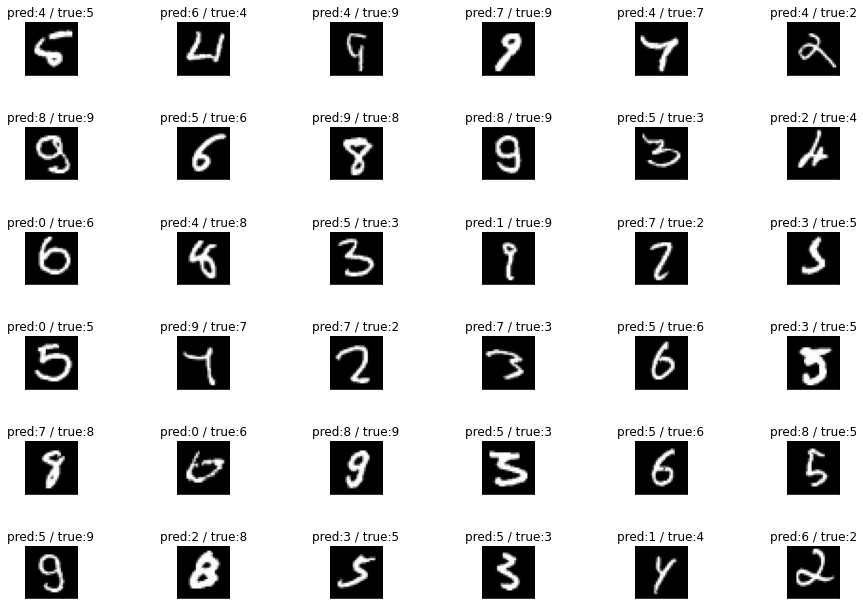

In [124]:
"""
語分類結果を並べて表示する。画像の上の表示は「推定結果/正解」である。
Parameters:
----------
y_pred : 推定値のndarray (n_samples,)
y_val : 検証データの正解ラベル(n_samples,)
X_val : 検証データの特徴量（n_samples, n_features)
"""
import numpy as np
import matplotlib.pyplot as plt
num = 36 # いくつ表示するか

true_false = y_pred==y_test
false_list = np.where(true_false==False)[0].astype(np.int)
if false_list.shape[0] < num:
    num = false_list.shape[0]
fig = plt.figure(figsize=(15, 10))
fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
for i in range(num):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    ax.set_title("pred:{} / true:{}".format(y_pred[false_list[i]],y_test[false_list[i]]))
    ax.imshow(X_test.reshape(-1,28,28)[false_list[i]], cmap='gray')